# Лабораторная работа №323 "Изучение pn-перехода и полупроводниковых диодов"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [121]:
def read_data(file_name):
    f = open(file_name, 'r')
    result = [np.empty(0), np.empty(0)]
    for s in f:
        s = s.split()
        result[0] = np.append(result[0], float(s[0]))
        result[1] = np.append(result[1], float(s[1]))
    return result

def find_coeffs(data, start_index=0):
    A = np.vstack((data[0][start_index:], 
                     np.ones_like(data[0][start_index:]))).T
    return np.linalg.pinv(A).dot(data[1][start_index:])

def add_err(data, min_error, relative_error):
    data.append(np.zeros_like(data[0])+min_error+relative_error*abs(data[1]))
    return data

## Упражнение 1: Изучение ВАХ полупроводникового диода

In [122]:
data1_positive = read_data('data1.txt')
data1_negative = read_data('data11.txt')
data1_positive = add_err(data1_positive, 0.02, 0.02)

### Построим прямую ветвь ВАХ диода

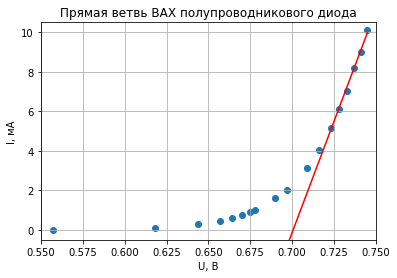

Uк = 0.700640978066396 +- 0.027936711947518334 В


In [146]:
r_1 = find_coeffs(data1_positive, data1_positive[0].size-6)
err_1 = abs(find_coeffs([data1_positive[0], data1_positive[2]], data1_positive[0].size-6))
plt.scatter(data1_positive[0], data1_positive[1])
plt.plot(data1_positive[0], r_1[0]*data1_positive[0]+r_1[1], 'r')
plt.xlabel('U, В')
plt.ylabel('I, мA')
plt.axis([0.55, 0.75, -0.5, 10.5])
plt.grid(True)
plt.title('Прямая ветвь ВАХ полупроводникового диода')
plt.show()
print(f'Uк = {-r_1[1]/r_1[0]} +- {-r_1[1]/r_1[0]*(err_1[0]/r_1[0]-err_1[1]/r_1[1])} В')

По МНК получаем: $U_k = 0.701 \pm 0.028\ B$ - контактная разность потенциалов в диоде

Проверим выполнение теоретической зависимости тока от напряжения:
$$\ln I = \ln I_0 - \dfrac{\varepsilon_g}{kT} + \dfrac{e}{kT}U$$
Для этого построим график $\ln I\left(U\right)$:

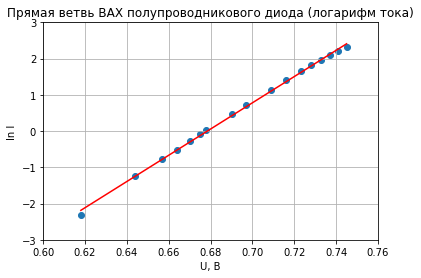

Коэф-т наклона: A = 36.189557261623236 +- 2.9917554448518757 1/В
Теоретическое значение: А = 38.647342995169076 1/В


In [137]:
log_data1 = [data1_positive[0][4:], np.log(data1_positive[1][4:]), data1_positive[2][4:]/data1_positive[1][4:]]
r_2 = find_coeffs(log_data1)
err_2 = abs(find_coeffs([log_data1[0], log_data1[2]]))
plt.scatter(log_data1[0], log_data1[1])
plt.plot(log_data1[0], r_2[0]*log_data1[0]+r_2[1], 'r')
plt.xlabel('U, В')
plt.ylabel('ln I')
plt.axis([0.6, 0.76, -3, 3])
plt.grid(True)
plt.title('Прямая ветвь ВАХ полупроводникового диода (логарифм тока)')
plt.show()
print(f'Коэф-т наклона: A = {r_2[0]} +- {3*err_2[0]} 1/В\nТеоретическое значение: А = {1.6e-19/(1.38e-23*300)} 1/В')

Коэффициент наклона этого графика $A = \dfrac{e}{kT}$.

Экспериментальное значение: $A = 36\pm 3\ 1/B$

Теоретическое значение: $A = 39\ 1/B$

Значения совпадают с учётом погрешности, а значит, теоретическое соотношение между током и напряжением выполняется
### Построим также обратную ветвь ВАХ

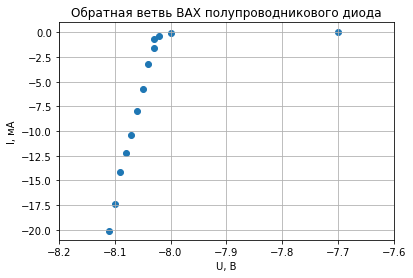

In [104]:
plt.scatter(data1_negative[0], data1_negative[1])
plt.xlabel('U, В')
plt.ylabel('I, мA')
plt.axis([-8.2, -7.6, -21, 1])
plt.grid(True)
plt.title('Обратная ветвь ВАХ полупроводникового диода')
plt.show()

## Упражнение 2: Измерение барьерной ёмкости pn-перехода

In [105]:
data2 = read_data('data2.txt')

### Построим график зависимости барьерной ёмкости диода от напряжения на нём

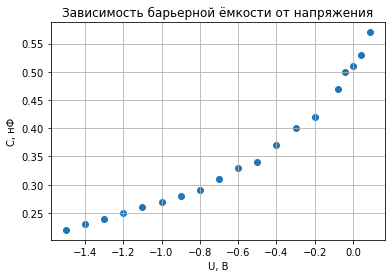

In [106]:
plt.scatter(data2[0], data2[1])
plt.xlabel('U, В')
plt.ylabel('С, нФ')
plt.grid(True)
plt.title('Зависимость барьерной ёмкости от напряжения')
plt.show()

Проверим теоретическую модель резкого pn-перехода:
$$\dfrac{1}{C_b^2} = \dfrac{2\left(U_k + |U|\right)\cdot\left(\dfrac{1}{n_n}+\dfrac{1}{p_p}\right)}{\varepsilon\varepsilon_0eS^2} $$
Для этого построим зависимость и приблизим по МНК: $\dfrac{1}{C_b^2}\left(U\right) = A\cdot U + B$.

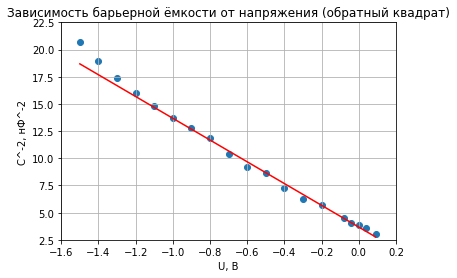

In [107]:
r_3 = find_coeffs([data2[0], 1/data2[1]**2], 3)
plt.scatter(data2[0], 1/data2[1]**2)
plt.plot(data2[0], r_3[0]*data2[0]+r_3[1], 'r')
plt.xlabel('U, В')
plt.ylabel('С^-2, нФ^-2')
plt.axis([-1.6, 0.2, 2.5, 22.5])
plt.grid(True)
plt.title('Зависимость барьерной ёмкости от напряжения (обратный квадрат)')
plt.show()

Проверим также модель, в которой $\dfrac{1}{C_b^3} = A\cdot U + B$:

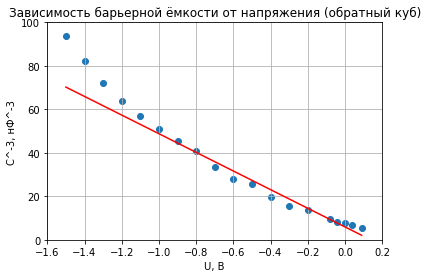

In [108]:
r_4 = find_coeffs([data2[0], 1/data2[1]**3], 4)
plt.scatter(data2[0], 1/data2[1]**3)
plt.plot(data2[0], r_4[0]*data2[0]+r_4[1], 'r')
plt.xlabel('U, В')
plt.ylabel('С^-3, нФ^-3')
plt.axis([-1.6, 0.2, 0, 100])
plt.grid(True)
plt.title('Зависимость барьерной ёмкости от напряжения (обратный куб)')
plt.show()

Видно, что в модель резкого pn-перехода (обратный квадрат ёмкости линеен по напряжению) хорошо описывает данные (лучше, чем модель с обратным кубом)

## Упражнение 3: Определение ширины запрещённой зоны кремния

In [139]:
data3 = read_data('data3.txt')
data3[0] = data3[0]+273
data3 = add_err(data3, 0.02, 0.02)

### Построим график температурной зависимости напряжения на диоде

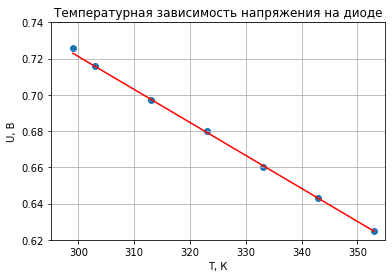

Коэффициент B = 1.2671266666666643 +- 0.1360275999999999 эВ


In [143]:
r_5 = find_coeffs(data3, 1)
err_5 = abs(find_coeffs([data3[0], data3[2]], 1))
plt.scatter(data3[0], data3[1])
plt.plot(data3[0], r_5[0]*data3[0]+r_5[1], 'r')
plt.xlabel('T, К')
plt.ylabel('U, В')
plt.axis([295, 355, 0.62, 0.74])
plt.grid(True)
plt.title('Температурная зависимость напряжения на диоде')
plt.show()
print(f'Коэффициент B = {r_5[1]} +- {3*err_5[1]} эВ')

Напряжение на диоде при постоянном токе выражается линейной функцией температуры:
$$U=\dfrac{kT}{e}\ln\dfrac{I}{I_0}+\dfrac{\varepsilon_g}{e}=AT+B.$$
Поэтому ширина запрещённой зоны в эВ численно равна коэффициенту $B$:
$$\varepsilon_g=1.27\pm 0.14\ eV\ (Experiment)$$
$$\varepsilon_g=1.12\ eV\ (Theory)$$
Значения совпадают с учётом погрешности, а значит, наша модель хорошо описывает систему

## Основные итоги работы
1. Получен ВАХ полупроводникового диода. Найдена контактная разность потенциалов $U_k = 0.701 \pm 0.028\ B$.
2. Подтверждена экспоненциальная зависимость тока от напряжения на прямой ветви ВАХ.
3. Получена зависимость барьерной ёмкости диода от напряжения на нём. Полученные данные точнее всего описываются моделью резкого pn-перехода ($1/C^2 = A\cdot U+B$).
4. Получено значение ширины запрещённой зоны кремния:
$$\varepsilon_g=1.27\pm 0.14\ eV\ (Experiment)$$
$$\varepsilon_g=1.12\ eV\ (Theory)$$
величины совпадают с учётом погрешности.